In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [2]:
def p(x):
    return (sts.norm(loc = -4, scale = 0.5).pdf(x) + sts.norm(loc = 4, scale = 1).pdf(x))

def q_rvs(x, e):
    
    return sts.norm(loc = x, scale = e).rvs()

def plot_acf(x):
    '''
    Plot the autocorrelation function for a series x. This corresponds to the
    acf() function in R. The series x is detrended by subtracting the mean of
    the series before computing the autocorrelation.
    The autocorrelation at lag = 0 is always 1 since the series is perfectly
    correlated with itself. You can ignore this value. The autocorrelation at
    all other values should be as small as possible, since independent samples
    have no correlation.
    '''
    from scipy import signal
    import matplotlib.pyplot as plt
    plt.acorr(
    x, maxlags=20, detrend=lambda x: signal.detrend(x, type='constant'))
    plt.show()

In [3]:
def metro_hast(t, e):
    
    x_samples = [] #array for x_samples
    rejections = 0 #rejections
    
    x = np.random.uniform(low = -6, high = 8)
    
    x_samples.append(x)#first x_sample
    
    for i in range(1,t): #Random walk
        
        x_t = q_rvs(x, e) #proposed location
        
        r = p(x_t)/p(x) #ratio between proposed location and current
        
        if np.random.random() < min(1, r): #If we accept the sample
            x = x_t
            x_samples.append(x)
        else: #if we reject
            x_samples.append(x)
            rejections += 1
    
    x_vals = np.linspace(-6, 8, 100)
    y_vals = np.linspace(1,0,t)
    
    plt.plot(x_vals, p(x_vals), label = "Target distribution")
    plt.plot(x_samples, y_vals, label = "Sample sequence", linewidth=0.1, color = "black")
    plt.legend()
    plt.title(f"Metropolis-Hasting with e = {e}")
    plt.show()
    
    print(f"acceptance rate: {rejections/t}")
    plot_acf(x_samples)
    
    
    

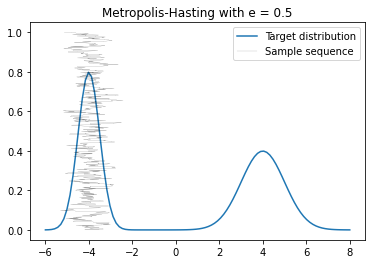

acceptance rate: 0.292


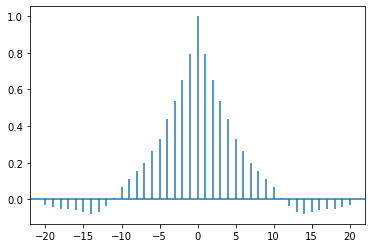

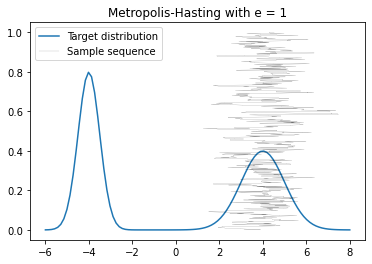

acceptance rate: 0.304


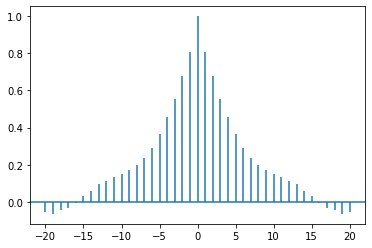

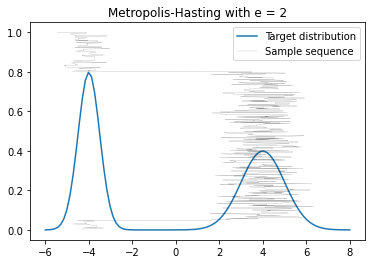

acceptance rate: 0.533


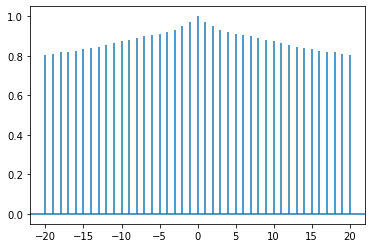

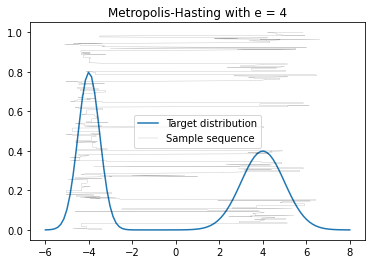

acceptance rate: 0.745


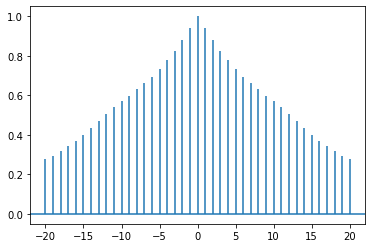

In [4]:
t = 1000

for e in [0.5, 1, 2, 4]:
    metro_hast(t, e)

As e is either small or big, the correlation between the samples seems to be fairly large as indicated by the autocorrelation plot. The correlation is the smallest for e equals to 1. 

The acceptance rate increase as e increases and is the smallest for e = 0.5.

For smaller e's, the metropolis hasting get's stuck at either peak. Because of this, e cannot be to small. The optimal e is 4 which has the lowest correlation while still covering both peaks.